<a href="https://colab.research.google.com/github/neetinds/Capstone3/blob/main/Capstone3_Data_science_Analytics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA STAGE : 
To identify the factors that lead to attrition with the goal of building a model that uses credentials of the candidate and various demographics factors to predict the probability of a candidate to look out for new jobs or remain at the company. Using modeling technique like clustering, classification, smote, xgboost-classifier etc.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Mount the gdrive to load the data

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Data Acquisition

##Load Train data set

In [6]:
train=pd.read_csv('/content/gdrive/MyDrive/Springboard-master/Capstone 3/aug_train.csv')
train=train.sample(frac=1,random_state=10).reset_index().drop('index',axis=1)
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,20753,city_1,0.847,Male,No relevent experience,Full time course,High School,NaN,4,10000+,Pvt Ltd,1,114,0.0
1,27035,city_167,0.921,Male,Has relevent experience,Full time course,Masters,STEM,5,100-500,Pvt Ltd,1,10,0.0
2,21753,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,10000+,Pvt Ltd,1,214,0.0
3,27579,city_97,0.925,Male,Has relevent experience,Full time course,Graduate,STEM,9,100-500,Public Sector,1,111,0.0
4,22405,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,500-999,Pvt Ltd,4,60,0.0


##Check rows/col's

In [7]:
train.shape

(19158, 14)

##Check datatype of data




In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## Dealing with missing values - Null/missing values across col's

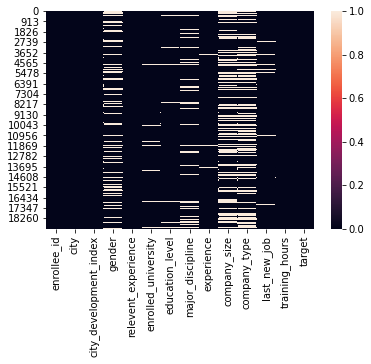

In [9]:
# Total Null values in the data set
sns.heatmap(train.isnull())
plt.show()

In [10]:
# Proportion of Null values in each column
propnull=train.isnull().sum()/len(train)
propnull

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

##Sampling : Remove samples from col's where they are less than 10%

In [11]:
# Removing samples with null values in columns containing less than 10% null values
sub=propnull[(propnull>0) & (propnull<0.1)].index
train.dropna(subset=sub,inplace=True)
train.shape

(18014, 14)

# Exploratory Data Analysis(EDA): Feature Engineering & Data Pre-processing

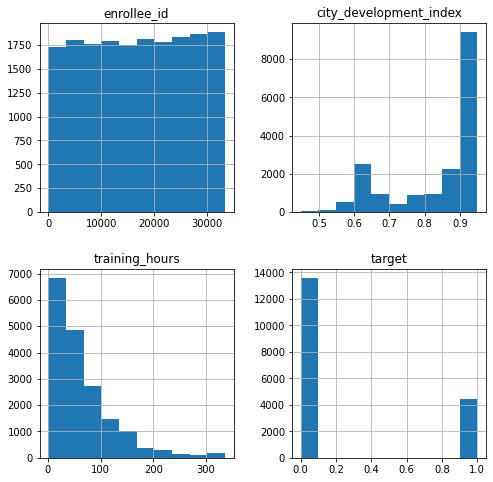

In [12]:
train.hist(figsize=(8,8))
plt.show()

## Numeric datatypes : Identifying & Running the Transformations

In [13]:
# Numeric Columns
num=train.select_dtypes(include='number')
num.head()

,enrollee_id,city_development_index,training_hours,target
0,20753,0.847,114,0.0
1,27035,0.921,10,0.0
2,21753,0.624,214,0.0
3,27579,0.925,111,0.0
4,22405,0.910,60,0.0


There are 4 numeric dataypes identified

In [14]:
num.shape

(18014, 4)

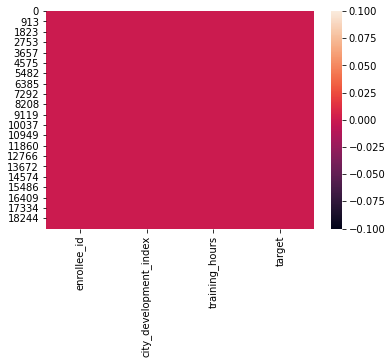

In [15]:
# Checking for null values
sns.heatmap(num.isnull())
plt.show()

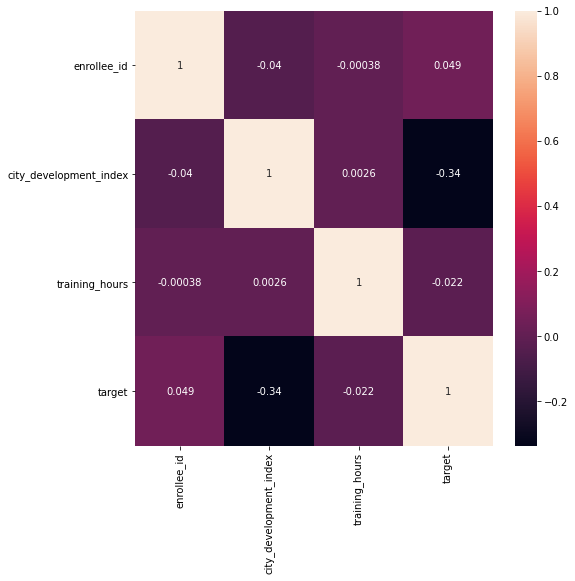

In [16]:
# Correlation for checking multicollinearity in numeric data and looking out for features having high impact on target
plt.figure(figsize=(8,8))
sns.heatmap(num.corr(),annot=True)
plt.show()

In [17]:
# Checking for duplicates in Enrollee ID (Id-Variable)
num['enrollee_id'].nunique()==len(train)

True

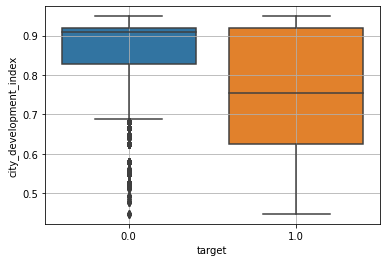

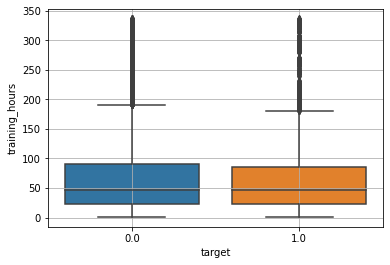

In [18]:
# Bivariate analysis of numeric features(after droping target and Id-variable) with target

n=num.drop(['target','enrollee_id'],axis=1) # Numeric features after droping target and Id-variable
for i in n:
    sns.boxplot(num['target'],n[i])
    plt.grid()
    plt.show()

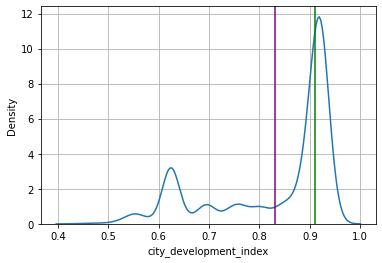

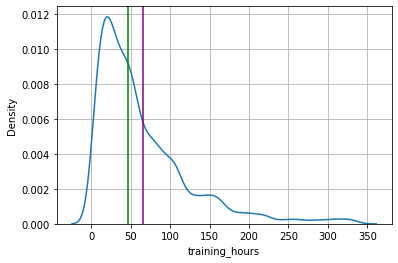

In [19]:
# Univariate or single variable analysis of numeric features after droping target and Id-variable
for i in n.columns: 
    sns.distplot(n[i],hist=False)
    plt.axvline(np.mean(n[i]),color='purple')
    plt.axvline(np.median(n[i]),color='green')
    plt.grid()
    plt.show()

In [20]:
# Checking minimum to look out for missing values
n.describe()    

,city_development_index,training_hours
count,18014.000000,18014.000000
mean,0.831728,65.347896
std,0.122115,60.059220
min,0.448000,1.000000
25%,0.745000,23.000000
50%,0.910000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


In [21]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,20753,city_1,0.847,Male,No relevent experience,Full time course,High School,NaN,4,10000+,Pvt Ltd,1,114,0.0
1,27035,city_167,0.921,Male,Has relevent experience,Full time course,Masters,STEM,5,100-500,Pvt Ltd,1,10,0.0
2,21753,city_21,0.624,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,10000+,Pvt Ltd,1,214,0.0
3,27579,city_97,0.925,Male,Has relevent experience,Full time course,Graduate,STEM,9,100-500,Public Sector,1,111,0.0
4,22405,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,500-999,Pvt Ltd,4,60,0.0


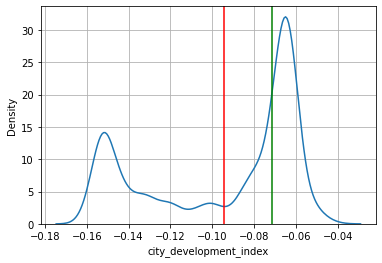

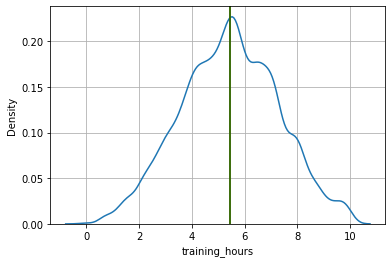

In [22]:
# Trying Boxcox tranformation on the numeric features to check skewness and distribution
import scipy.stats as stats
for i in n.columns:
    sns.distplot(stats.boxcox(n[i])[0],hist=False)
    plt.axvline(np.mean(stats.boxcox(n[i])[0]),color='red')
    plt.axvline(np.median(stats.boxcox(n[i])[0]),color='green')
    
    plt.xlabel(i)
    plt.grid()
    plt.show()

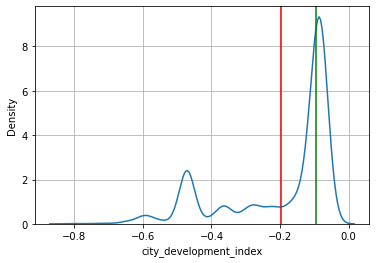

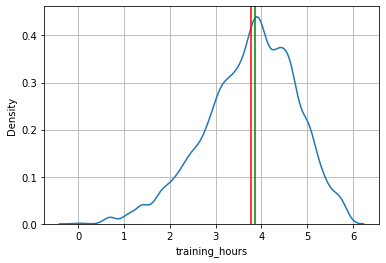

In [23]:
# Trying Log tranformation on the numeric features to check skewness and distribution
for i in n.columns:
    sns.distplot(np.log(n[i]),hist=False)
    plt.axvline(np.mean(np.log(n[i])),color='red')
    plt.axvline(np.median(np.log(n[i])),color='green')
    
    plt.xlabel(i)
    plt.grid()
    plt.show()

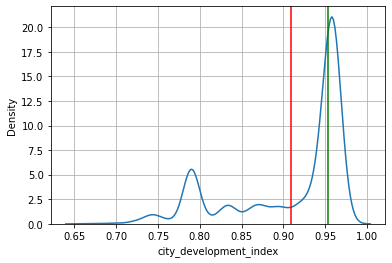

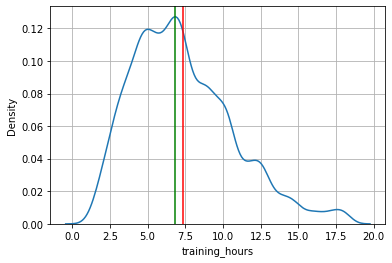

In [24]:
# Trying sqrt tranformation on the numeric features to check skewness and distribution
for i in n.columns:
    sns.distplot(np.sqrt(n[i]),hist=False)
    plt.axvline(np.mean(np.sqrt(n[i])),color='red')
    plt.axvline(np.median(np.sqrt(n[i])),color='green')
    
    plt.xlabel(i)
    plt.grid()
    plt.show()

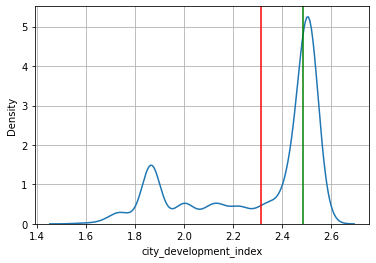

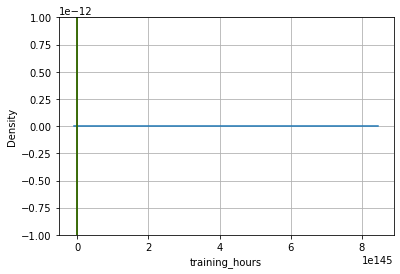

In [25]:
# Trying exponential tranformation on the numeric features to check skewness and distribution
for i in n.columns:
    sns.distplot(np.exp(n[i]),hist=False)
    plt.axvline(np.mean(np.exp(n[i])),color='red')
    plt.axvline(np.median(np.exp(n[i])),color='green')
    
    plt.xlabel(i)
    plt.grid()
    plt.show()

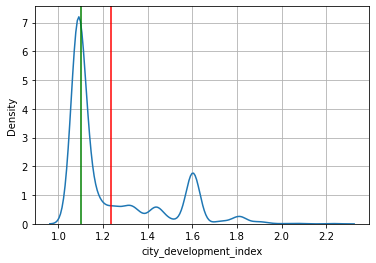

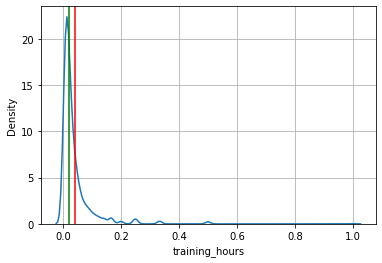

In [26]:
# Trying inverse tranformation on the numeric features to check skewness and distribution
for i in n.columns:
    sns.distplot(1/n[i],hist=False)
    plt.axvline(np.mean(1/n[i]),color='red')
    plt.axvline(np.median(1/n[i]),color='green')
    
    plt.xlabel(i)
    plt.grid()
    plt.show()

In [27]:
# Transforming the numeric features (target and id variable not included) using Boxcox Transformation
for i in n:
    n[i]=stats.boxcox(n[i])[0]
n.head()

,city_development_index,training_hours
0,-0.103387,7.304179
1,-0.064359,2.823142
2,-0.151783,8.801794
3,-0.061730,7.244260
4,-0.071285,5.935420


In [28]:
# Updating these transformations onto the train set
for i in n.columns:
    train[i]=n[i]
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,20753,city_1,-0.103387,Male,No relevent experience,Full time course,High School,NaN,4,10000+,Pvt Ltd,1,7.304179,0.0
1,27035,city_167,-0.064359,Male,Has relevent experience,Full time course,Masters,STEM,5,100-500,Pvt Ltd,1,2.823142,0.0
2,21753,city_21,-0.151783,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,10000+,Pvt Ltd,1,8.801794,0.0
3,27579,city_97,-0.061730,Male,Has relevent experience,Full time course,Graduate,STEM,9,100-500,Public Sector,1,7.244260,0.0
4,22405,city_16,-0.071285,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,500-999,Pvt Ltd,4,5.935420,0.0


In [29]:
# Scalling these transformed numeric features
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

train[n.columns]=sc.fit_transform(train[n.columns])
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,20753,city_1,-0.244037,Male,No relevent experience,Full time course,High School,NaN,4,10000+,Pvt Ltd,1,1.011196,0.0
1,27035,city_167,0.825214,Male,Has relevent experience,Full time course,Masters,STEM,5,100-500,Pvt Ltd,1,-1.418698,0.0
2,21753,city_21,-1.569897,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,10000+,Pvt Ltd,1,1.823295,0.0
3,27579,city_97,0.897221,Male,Has relevent experience,Full time course,Graduate,STEM,9,100-500,Public Sector,1,0.978704,0.0
4,22405,city_16,0.635462,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,500-999,Pvt Ltd,4,0.268970,0.0


In [30]:
train.shape

(18014, 14)

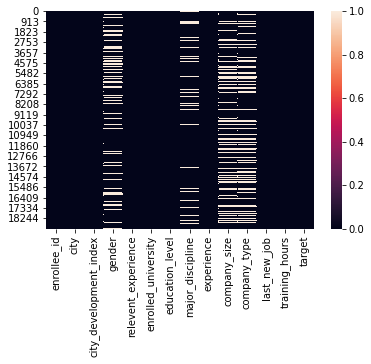

In [31]:
sns.heatmap(train.isnull())
plt.show()

In [32]:
train.isnull().sum()/len(train)

enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.214444
relevent_experience       0.000000
enrolled_university       0.000000
education_level           0.000000
major_discipline          0.123349
experience                0.000000
company_size              0.294771
company_type              0.303986
last_new_job              0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

##  Categoric datatypes : Identifying & Running the Transformations

In [33]:
categ=train.select_dtypes(include='object')
categ.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_1,Male,No relevent experience,Full time course,High School,NaN,4,10000+,Pvt Ltd,1
1,city_167,Male,Has relevent experience,Full time course,Masters,STEM,5,100-500,Pvt Ltd,1
2,city_21,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,10000+,Pvt Ltd,1
3,city_97,Male,Has relevent experience,Full time course,Graduate,STEM,9,100-500,Public Sector,1
4,city_16,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,500-999,Pvt Ltd,4


In [34]:
categ.shape

(18014, 10)

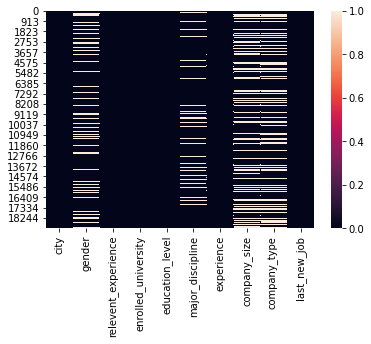

In [35]:
sns.heatmap(categ.isnull())
plt.show()

In [36]:
# Proprtion of null in each feature
propnc=categ.isnull().sum()/len(train)
propnc

city                   0.000000
gender                 0.214444
relevent_experience    0.000000
enrolled_university    0.000000
education_level        0.000000
major_discipline       0.123349
experience             0.000000
company_size           0.294771
company_type           0.303986
last_new_job           0.000000
dtype: float64

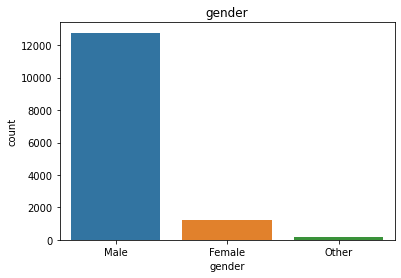

        Proportion % 
Male        70.900411
Female       6.694793
Other        0.960364


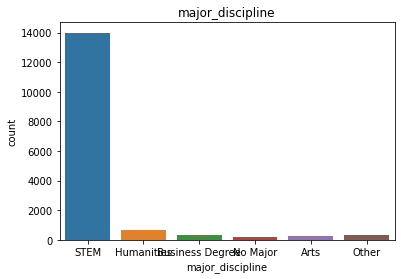

                 Proportion % 
STEM                 77.678472
Humanities            3.624958
Other                 2.020651
Business Degree       1.787499
Arts                  1.376707
No Major              1.176862


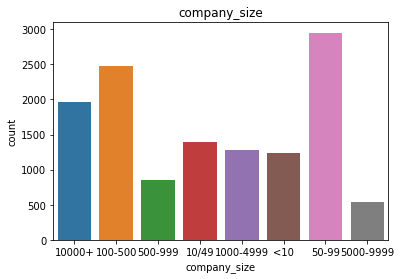

           Proportion % 
50-99          16.376152
100-500        13.783724
10000+         10.902631
10/49           7.738426
1000-4999       7.116687
<10             6.894638
500-999         4.701899
5000-9999       3.008771


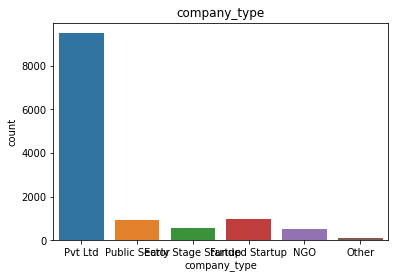

                     Proportion % 
Pvt Ltd                  52.597979
Funded Startup            5.412457
Public Sector             5.062729
Early Stage Startup       3.119796
NGO                       2.775619
Other                     0.632841


In [37]:
# Univariate analysis on categoric features with more than 10% null values
# Percentage Proportion of categoric groups in the feature with null>10% for identiying dominant groups

nc=propnc[propnc>0.1].index # Index of categoric features with more than 10% null values
for i in nc:
    plt.title(i)
    sns.countplot(categ[i])
    plt.show()
    a=100*categ[i].value_counts()/len(categ)
    a=pd.DataFrame(a).rename({i:'Proportion % '},axis=1)
    print(a)

In [38]:
# Identifying the most Dominant categories in each feature dominating more than 50% of the total counts of that feature

domin=[] # List of the most Dominant categories in each feature dominating more than 50% of the total counts of that feature
dfeat=[] # Features associated with these 'most' dominant categories

ndfeat=[] # Features that had most dominant category not being so dominant (less than 50%) 

for i in nc:                    # nc is the index of categorical features with >10% null
    maxi=categ[i].value_counts().max()    # Count of the most dominant group
    dom=categ[i].value_counts().idxmax()  # Most dominant group in the feature
    
    if maxi/len(categ)>=0.5:    # Filtering out ONLY those dominant categories that dominate >=50% proportion in that feature
        domin.append(dom)
        dfeat.append(i)
    else:
        ndfeat.append(i)
        
mstdmnt=pd.DataFrame({'Most Dominant Categories':domin,'Feature':dfeat}) # Tabular representation of dominant categories and the features that contain them
print(mstdmnt)
print()
print('Features with not so dominant labels: ',ndfeat) # List of features with 'not so dominant' dominant labels

  Most Dominant Categories           Feature
0                     Male            gender
1                     STEM  major_discipline
2                  Pvt Ltd      company_type

Features with not so dominant labels:  ['company_size']


##### Null value imputaion

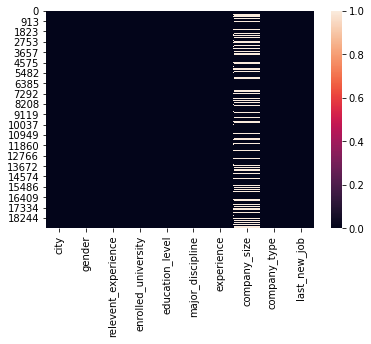

In [39]:
# Replacing Null of features with the 'most' dominant categories for features with dominant class that occupies more than 50% of the feature

categ=train.select_dtypes(include='object')

for i in mstdmnt.values:
    categ[i[1]].fillna(i[0],inplace=True)

sns.heatmap(categ.isnull())
plt.show()

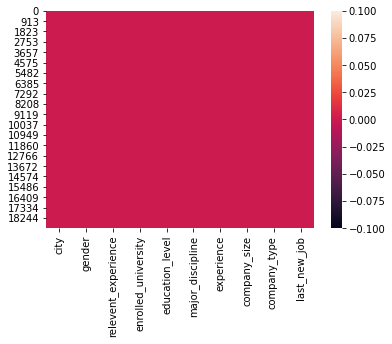

In [40]:
# Replacing null of features as 'OTHERS' for those features whose most dominant class is 'not so dominant' (ei occupy less than 50%)

for i in ndfeat: # List of features with 'not so dominant' dominant labels
    categ[i].fillna('OTHERS',inplace=True)

sns.heatmap(categ.isnull())
plt.show()

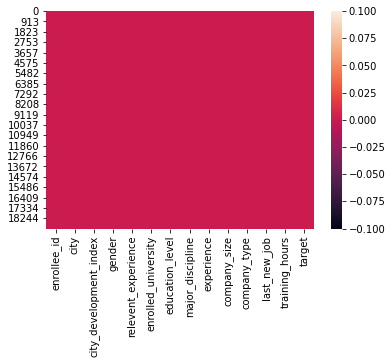

In [41]:
# Updating training set with clean categoric features
train[categ.columns]=categ

sns.heatmap(train.isnull())
plt.show()

In [42]:
train.shape

(18014, 14)

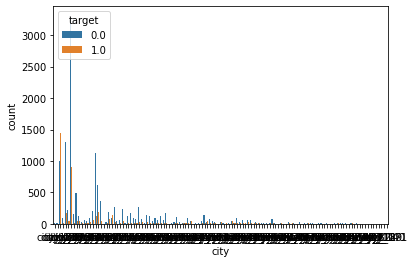

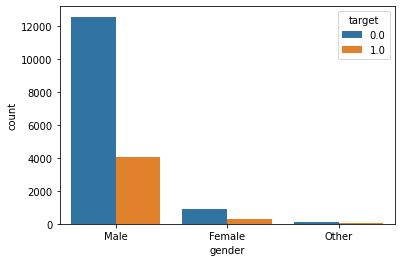

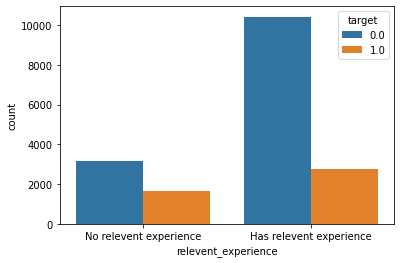

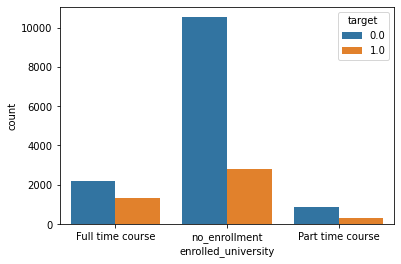

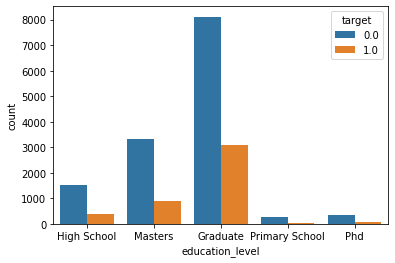

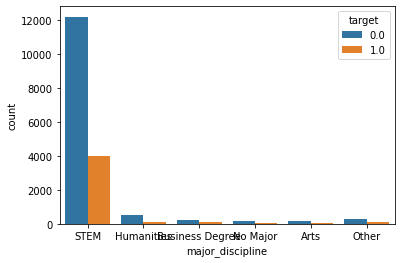

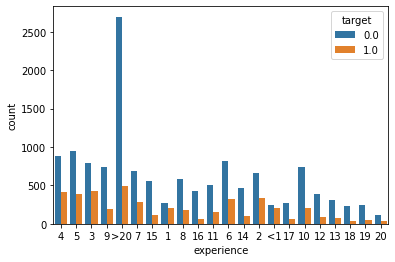

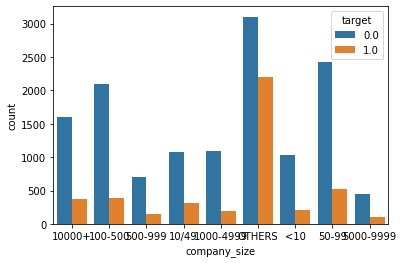

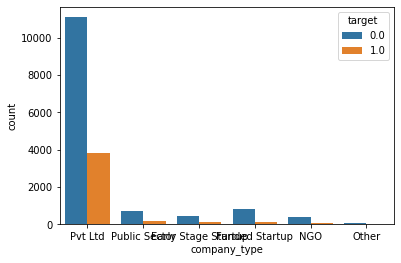

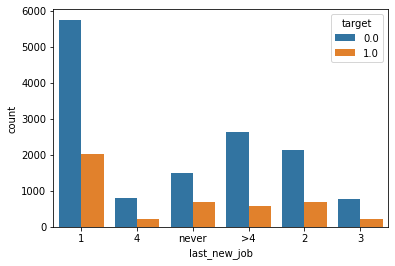

In [43]:
# Bivariate analysis of categorical features against the target
for i in categ:
    sns.countplot(categ[i],hue=train['target'])
    plt.show()

#### Collapsing categories of categoric features with many levels by Clustering

In [44]:
categ.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,city_1,Male,No relevent experience,Full time course,High School,STEM,4,10000+,Pvt Ltd,1
1,city_167,Male,Has relevent experience,Full time course,Masters,STEM,5,100-500,Pvt Ltd,1
2,city_21,Female,Has relevent experience,no_enrollment,Graduate,STEM,3,10000+,Pvt Ltd,1
3,city_97,Male,Has relevent experience,Full time course,Graduate,STEM,9,100-500,Public Sector,1
4,city_16,Male,Has relevent experience,no_enrollment,Graduate,STEM,9,500-999,Pvt Ltd,4


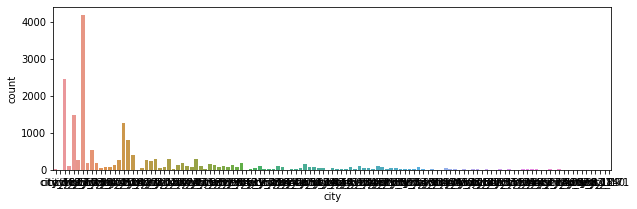

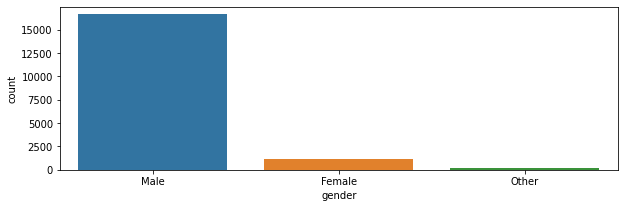

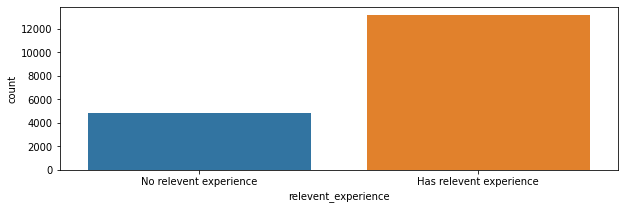

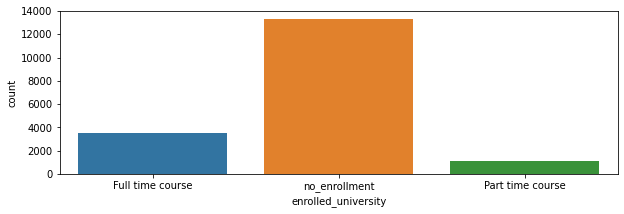

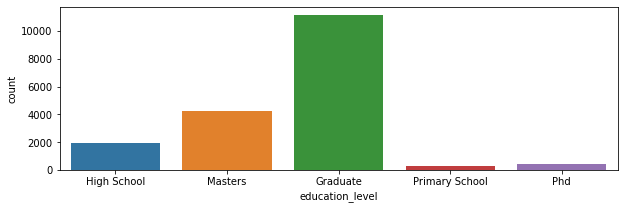

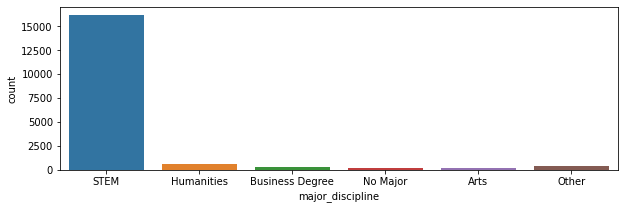

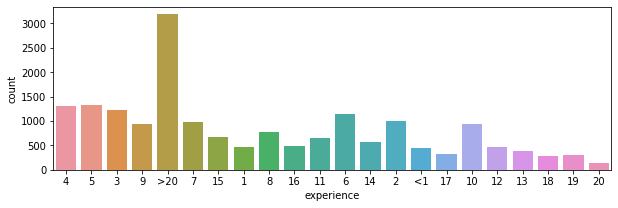

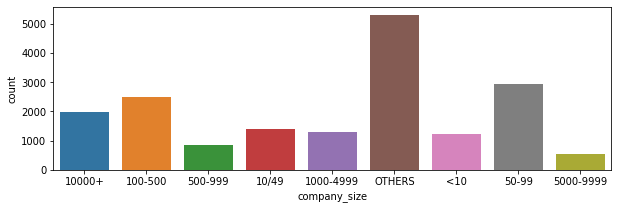

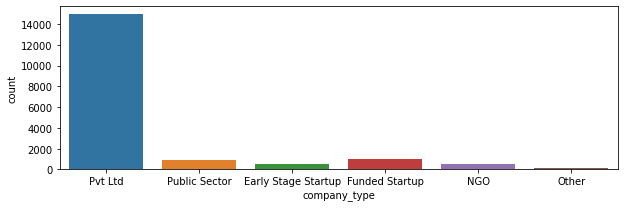

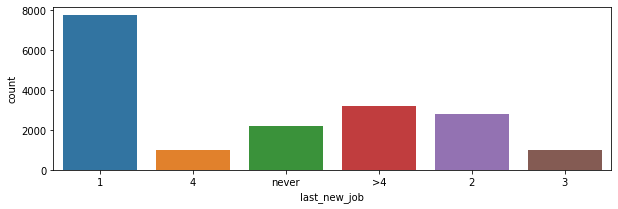

In [45]:
# Visualizing the label distributions among categoric features
for i in categ:
    plt.figure(figsize=(10,3))
    sns.countplot(categ[i])
    plt.show()

In [46]:
desc=categ.describe()
desc

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,18014,18014,18014,18014,18014,18014,18014,18014,18014,18014
unique,123,3,2,3,5,6,22,9,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,OTHERS,Pvt Ltd,1
freq,4194,16635,13190,13348,11188,16215,3182,5310,14951,7789


In [47]:
# Checking the number of levels in each categoric feature
n_grp=pd.DataFrame(desc.iloc[1,:],index=desc.columns).rename({'unique':'Number of levels'},axis=1)
n_grp

,Number of levels
city,123
gender,3
relevent_experience,2
enrolled_university,3
education_level,5
major_discipline,6
experience,22
company_size,9
company_type,6
last_new_job,6


In [48]:
# Filtering out features with more than 6 levels
manylevelfeat=n_grp[n_grp['Number of levels']>6]

colps=list(manylevelfeat.index)   # Names of features with more than 6 levels (to be collapsed)

print(manylevelfeat)
print()
print(colps) 

             Number of levels
city                      123
experience                 22
company_size                9

['city', 'experience', 'company_size']


In [49]:
# Features to be collapsed
colps

['city', 'experience', 'company_size']